In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [18]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows of each dataset
print("Customers Data:")
display(customers.head())

print("\nProducts Data:")
display(products.head())

print("\nTransactions Data:")
display(transactions.head())

Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [19]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [20]:
# Check for missing values
print("Missing values in Customers:")
print(customers.isnull().sum())

print("\nMissing values in Products:")
print(products.isnull().sum())

print("\nMissing values in Transactions:")
print(transactions.isnull().sum())

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [22]:
# Customer analysis
customer_purchase_freq = transactions.groupby('CustomerID').size()
customer_total_spend = transactions.groupby('CustomerID')['TotalValue'].sum()
customer_avg_transaction = transactions.groupby('CustomerID')['TotalValue'].mean()

customer_metrics = pd.DataFrame({
    'purchase_frequency': customer_purchase_freq,
    'total_spend': customer_total_spend,
    'avg_transaction': customer_avg_transaction
})

print("\nCustomer Metrics Summary:")
print(customer_metrics.describe())


Customer Metrics Summary:
       purchase_frequency   total_spend  avg_transaction
count          199.000000    199.000000       199.000000
mean             5.025126   3467.314372       687.580182
std              2.198340   1832.677958       237.936649
min              1.000000     82.360000        82.360000
25%              3.000000   2162.040000       542.941667
50%              5.000000   3137.660000       677.207500
75%              6.000000   4770.225000       828.624167
max             11.000000  10673.870000      1323.133333


In [24]:
# Product analysis
product_sales = transactions.groupby('ProductID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values('TotalValue', ascending=False)

print("\nTop 5 Products by Sales Value:")
print(product_sales.head())


Top 5 Products by Sales Value:
           Quantity  TotalValue
ProductID                      
P029             45    19513.80
P079             43    17946.91
P048             43    17905.20
P020             38    15060.92
P062             39    14592.24


In [25]:
# Regional analysis
regional_sales = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID')
regional_summary = regional_sales.groupby('Region').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).sort_values('TotalValue', ascending=False)

print("\nRegional Sales Summary:")
print(regional_summary)


Regional Sales Summary:
               TransactionID  TotalValue
Region                                  
South America            304   219352.56
Europe                   234   166254.63
North America            244   152313.40
Asia                     218   152074.97


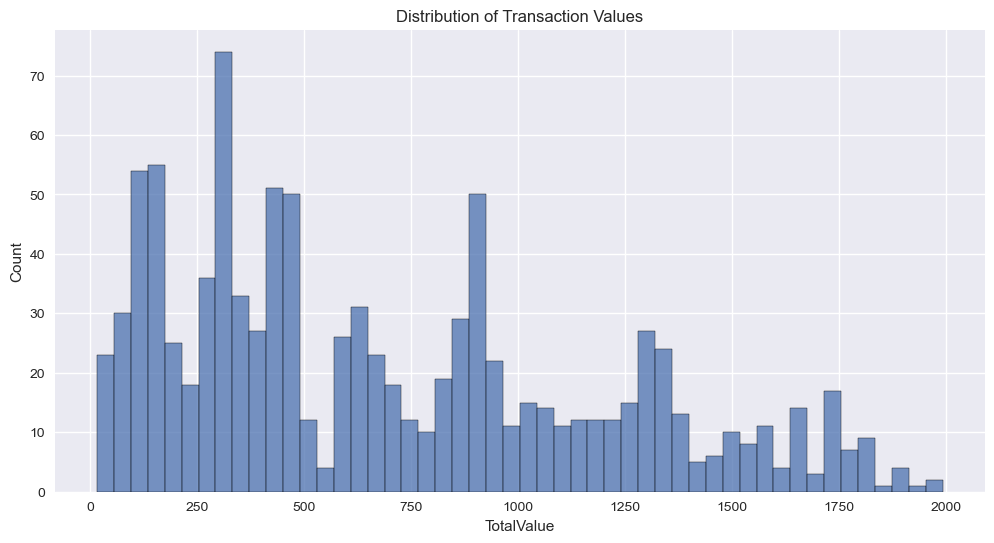

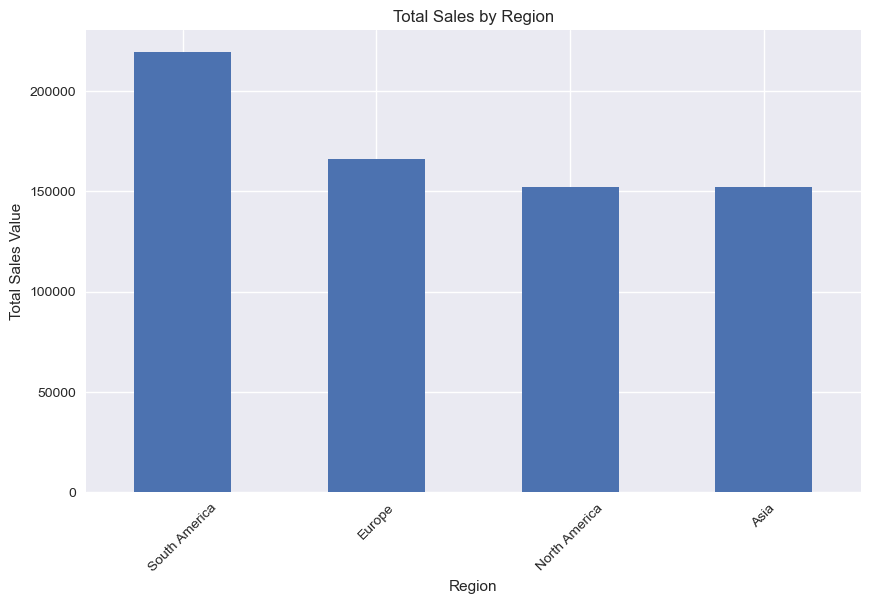

In [28]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(data=transactions, x='TotalValue', bins=50)
plt.title('Distribution of Transaction Values')
plt.show()

plt.figure(figsize=(10, 6))
regional_summary['TotalValue'].plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

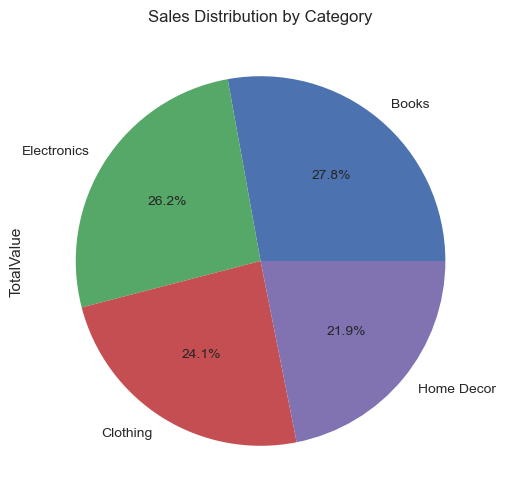

In [30]:
# Category analysis
category_sales = pd.merge(transactions, products[['ProductID', 'Category']], on='ProductID')
category_summary = category_sales.groupby('Category').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).sort_values('TotalValue', ascending=False)

plt.figure(figsize=(10, 6))
category_summary['TotalValue'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.show()

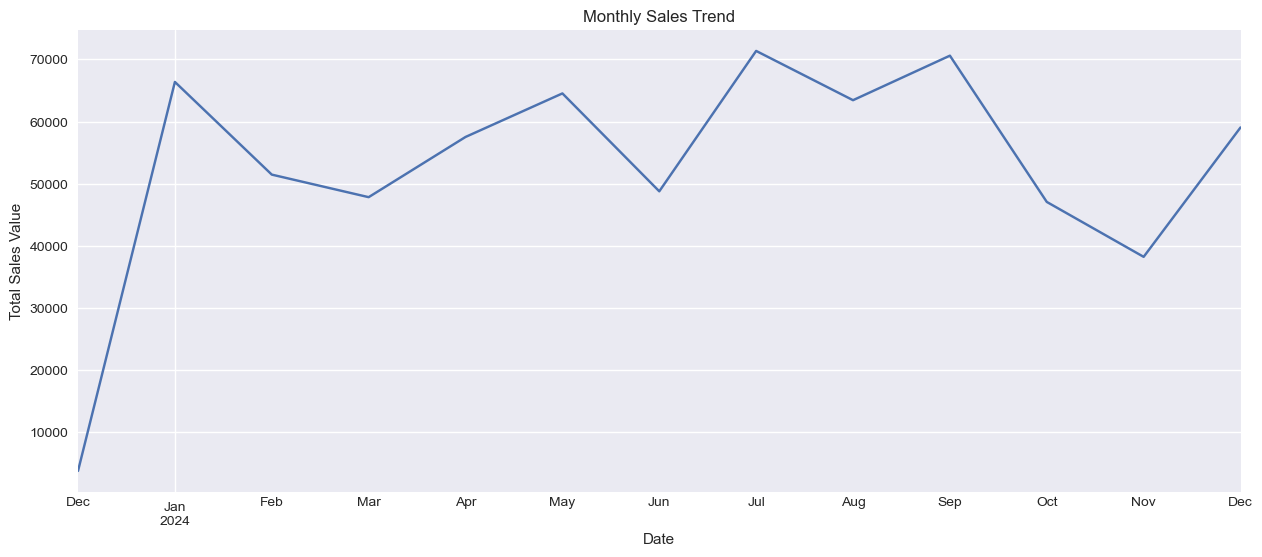

In [31]:
# Time series analysis
monthly_sales = transactions.set_index('TransactionDate').resample('M')['TotalValue'].sum()

plt.figure(figsize=(15, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.show()

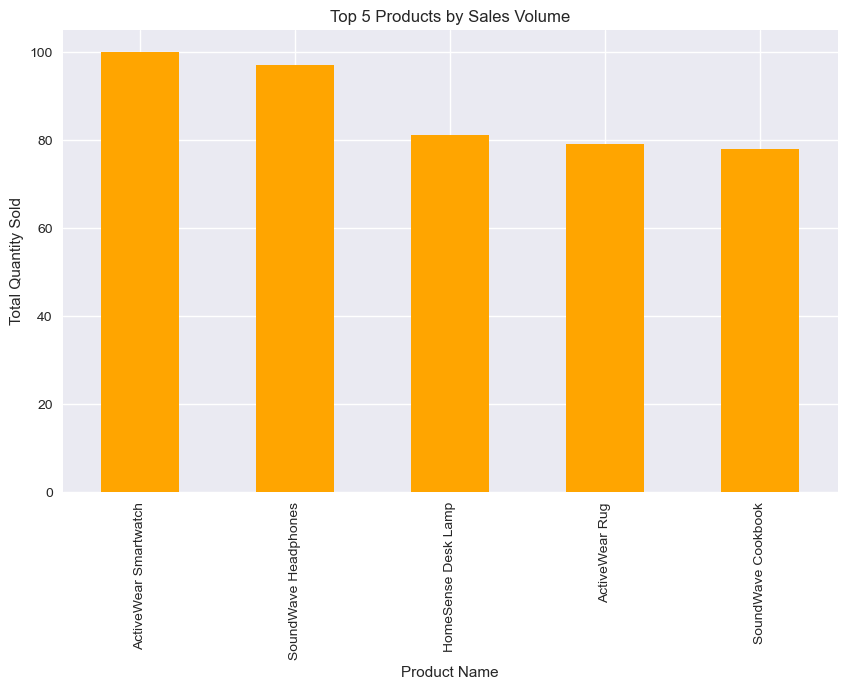

In [34]:
# Merge datasets
merged = pd.merge(transactions, customers, on='CustomerID')
merged = pd.merge(merged, products, on='ProductID')


# Top products by sales volume
top_products = merged.groupby('ProductName')['Quantity'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

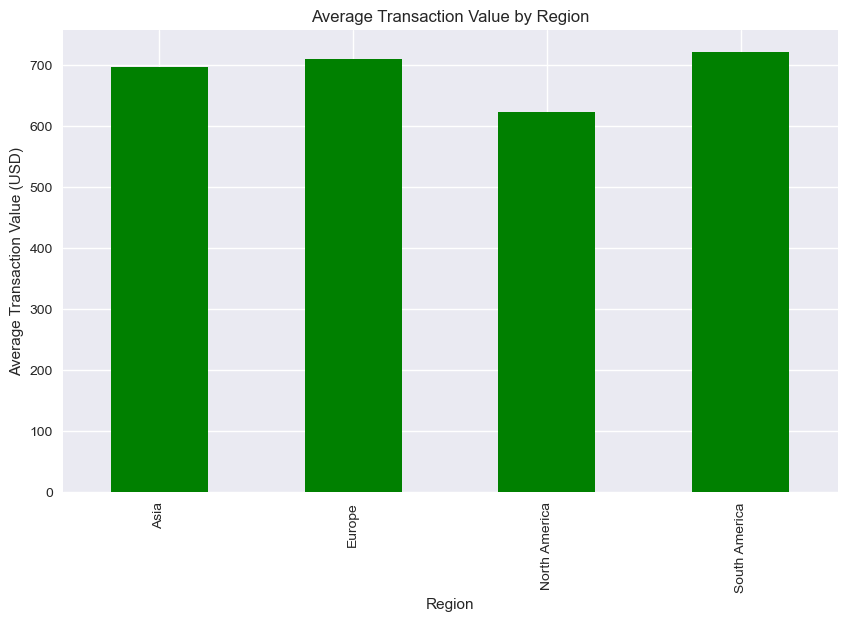

In [35]:
# Average transaction value by region
avg_transaction_value = merged.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
avg_transaction_value.plot(kind='bar', color='green')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

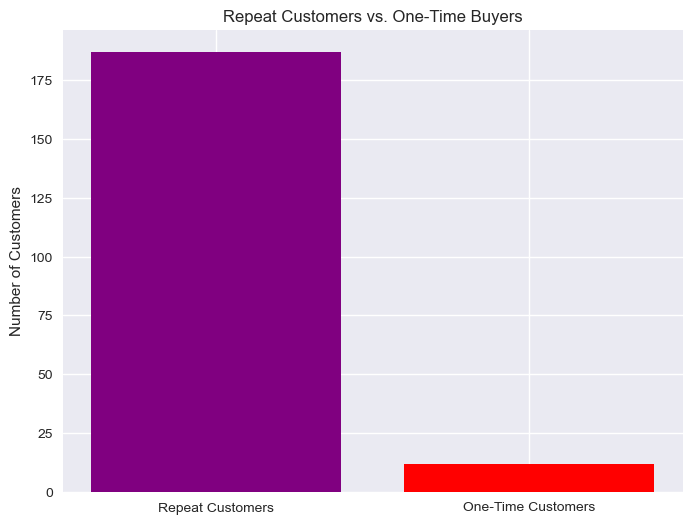

In [36]:
# Repeat customers vs. one-time buyers
repeat_customers = merged['CustomerID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].count()
one_time_customers = merged['CustomerID'].nunique() - repeat_customers

plt.figure(figsize=(8, 6))
plt.bar(['Repeat Customers', 'One-Time Customers'], [repeat_customers, one_time_customers], color=['purple', 'red'])
plt.title('Repeat Customers vs. One-Time Buyers')
plt.ylabel('Number of Customers')
plt.show()